In [2]:
# importing libraries.
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [3]:
# reading the dataset using pandas.
df = pd.read_csv('dataset.csv')
df

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [4]:
# checking columns in dataset.
df.columns

Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')

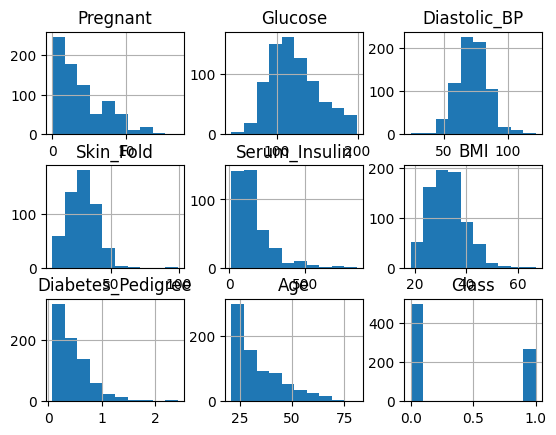

In [5]:
df.hist()
plt.show()

In [6]:
# checking null values in dataset if any.
def checkNull():
    print(df.isna().sum())
checkNull()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


In [7]:
# filling NA values with mean vlaue because ratio of missing values with total records < 50%

def removeNA(s):
    warnings.filterwarnings("ignore")
    for i in s:
        avg = int(df[i].mean())
        df[i].fillna(avg,inplace = True)
        print(df[i].isna().sum())
removeNA(['Glucose','Skin_Fold','Diastolic_BP','BMI'])


0
0
0
0


In [9]:
# dropping Serum_Insulin column because ratio of missing values with respect to total record is almost 50%.
df.drop('Serum_Insulin',axis = 1 , inplace = True)

In [46]:
# all the missing values have been resolved now.
# df.isna().sum()
checkNull()

Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64


In [13]:
# storing attributes in a varibale for applying differnt  operations.
attributes = df.columns[0:8]
attributes

Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'BMI',
       'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')

In [14]:
# printing sum , standaRd deviation and mean of each attribute 
for i in attributes:
    print(f'sum of {i} attribute : ',df[i].sum())
    print(f'mean of {i} attribute : ',df[i].mean())
    print(f'standard deviation of {i} attribute : ',df[i].std())
    print()

sum of Pregnant attribute :  2953
mean of Pregnant attribute :  3.8450520833333335
standard deviation of Pregnant attribute :  3.3695780626988694

sum of Glucose attribute :  93452.0
mean of Glucose attribute :  121.68229166666667
standard deviation of Glucose attribute :  30.4359990476236

sum of Diastolic_BP attribute :  55593.0
mean of Diastolic_BP attribute :  72.38671875
standard deviation of Diastolic_BP attribute :  12.096641733978139

sum of Skin_Fold attribute :  22355.0
mean of Skin_Fold attribute :  29.108072916666668
standard deviation of Skin_Fold attribute :  8.791221023089706

sum of BMI attribute :  24922.3
mean of BMI attribute :  32.45091145833333
standard deviation of BMI attribute :  6.875366469974719

sum of Diabetes_Pedigree attribute :  362.40099999999995
mean of Diabetes_Pedigree attribute :  0.47187630208333325
standard deviation of Diabetes_Pedigree attribute :  0.3313285950127749

sum of Age attribute :  25529
mean of Age attribute :  33.240885416666664
stand

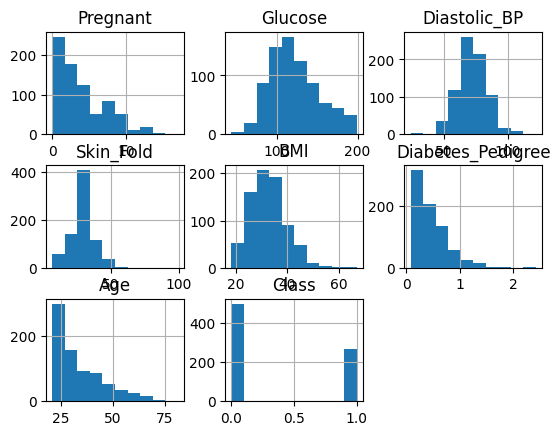

In [15]:
# plotting histogram of each attribute using matplotlib.pyplot library.
df.hist()
plt.show()

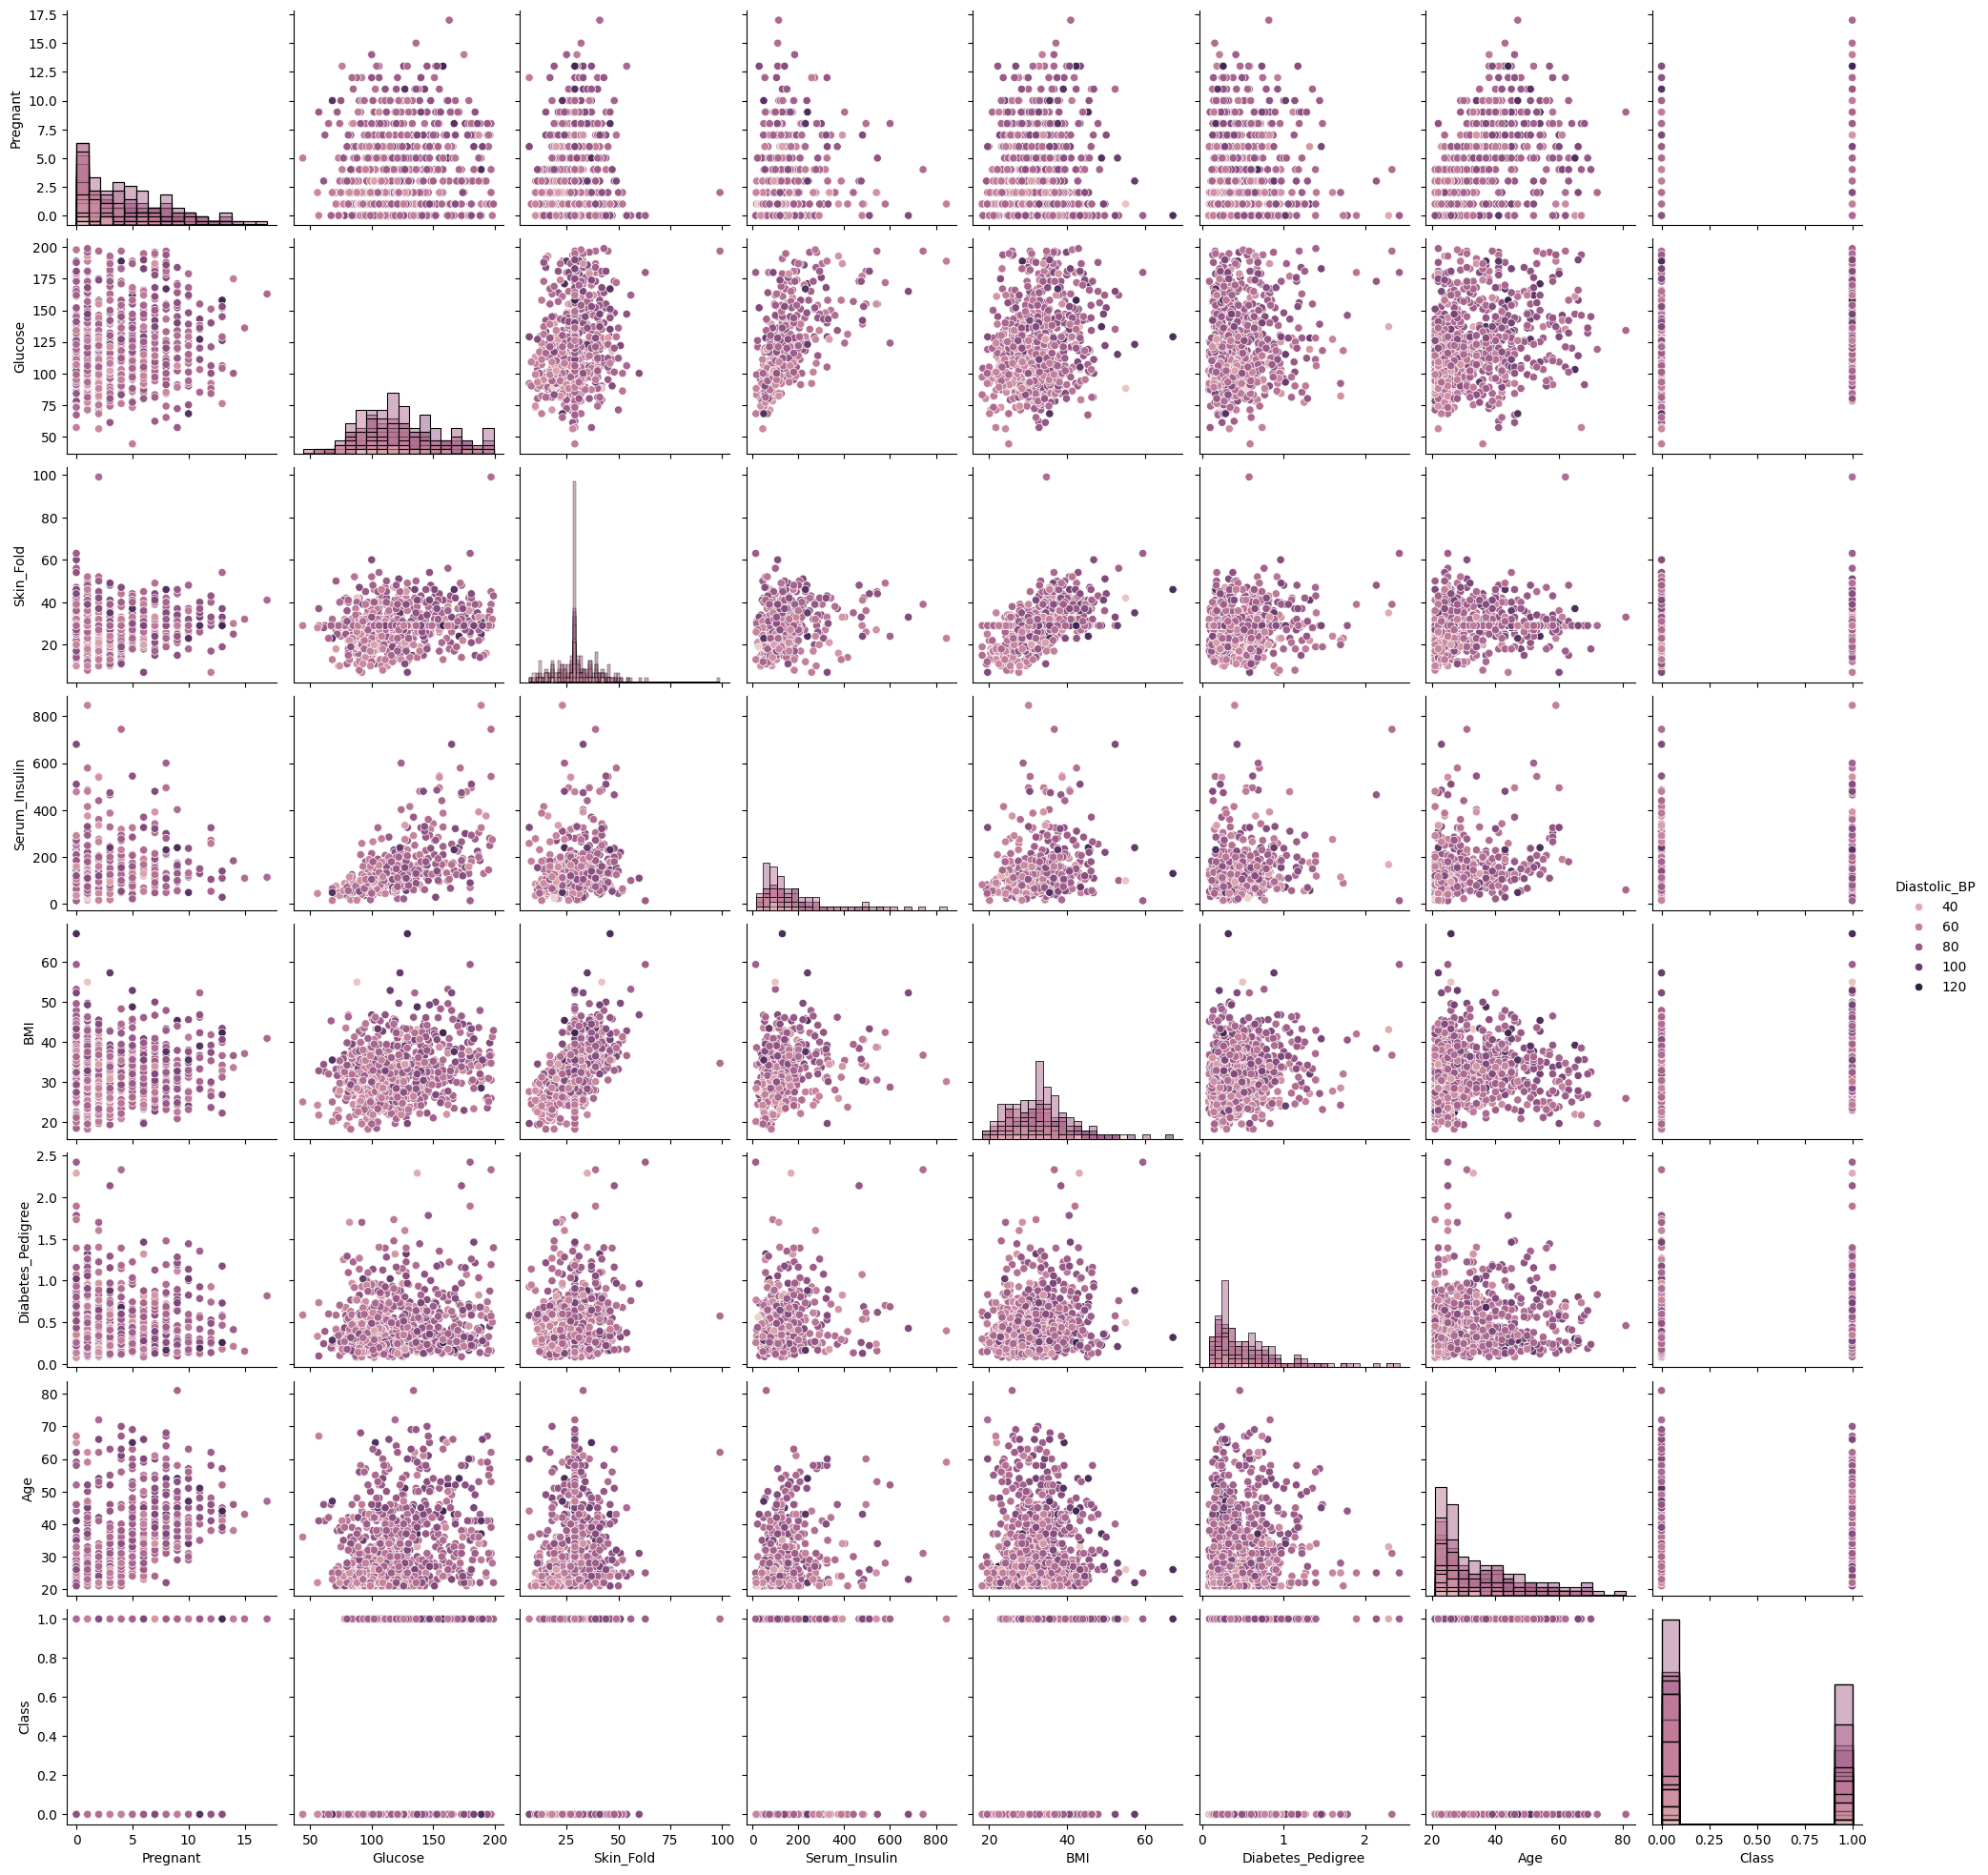

In [9]:
# plotting one column with respect to each column using seaborn library and for diagonals , using histpgram itself.
sns.pairplot(df,hue='Diastolic_BP',diag_kind="hist")

In [36]:
# taking features in x variable and the class which would be predicted in y variable.

x = df.iloc[:,0:7]
y = df['Class']

In [43]:
def Scaling(x):
    aaa = int(input('do you want to use Standard Scaler(0) or MinMaxScaler(1) ?'))
    if aaa == 0:
        sc = StandardScaler()
        x = sc.fit_transform(x)
        print(x)
    else:
        MiMa = MinMaxScaler()
        x = MiMa.fit_transform(x)
        print(x)
Scaling(x)


[[0.35294118 0.67096774 0.48979592 ... 0.31492843 0.23441503 0.48333333]
 [0.05882353 0.26451613 0.42857143 ... 0.17177914 0.11656704 0.16666667]
 [0.47058824 0.89677419 0.40816327 ... 0.10429448 0.25362938 0.18333333]
 ...
 [0.29411765 0.49677419 0.48979592 ... 0.16359918 0.07130658 0.15      ]
 [0.05882353 0.52903226 0.36734694 ... 0.24335378 0.11571307 0.43333333]
 [0.05882353 0.31612903 0.46938776 ... 0.24948875 0.10119556 0.03333333]]
